<a href="https://colab.research.google.com/github/karlie38/Full_Stack_DL/blob/main/Lab_3_RNNs_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Aug 10 13:22:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# FSDL Spring 2021 Setup
!git clone https://github.com/full-stack-deep-learning/fsdl-text-recognizer-2021-labs
%cd fsdl-text-recognizer-2021-labs
!pip3 install boltons wandb pytorch_lightning==1.1.4 pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 torchtext==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
%env PYTHONPATH=.:$PYTHONPATH

Cloning into 'fsdl-text-recognizer-2021-labs'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 798 (delta 158), reused 144 (delta 140), pack-reused 566
Receiving objects: 100% (798/798), 18.89 MiB | 22.89 MiB/s, done.
Resolving deltas: 100% (394/394), done.
/content/fsdl-text-recognizer-2021-labs
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 193 kB 9.0 MB/s 
     |████████████████████████████████| 1.8 MB 63.7 MB/s 
     |████████████████████████████████| 684 kB 69.4 MB/s 
     |███████████████████████         | 834.1 MB 1.2 MB/s eta 0:04:22tcmalloc: large alloc 1147494400 bytes == 0x55bd120cc000 @  0x7f3d1d487615 0x55bcd848202c 0x55bcd856217a 0x55bcd8484e4d 0x55bcd8576c0d 0x55bcd84f90d8 0x55bcd84f3c35 0x55bcd848673a 0x55bcd84f8f40 0x55bcd84f3c35 0x55bcd848673a 0x55bcd84f593b 0x55bcd8577a56 0x55bcd84f4fb3 0x55bcd8577a56 0

In [ ]:
%cd lab3

/content/fsdl-text-recognizer-2021-labs/lab3


## conv_dim = 64 with crossentropy loss (LineCNN)

In [ ]:
!python training/run_experiment.py --conv_dim=64 --max_epochs=10 --gpus=1 --num_workers=4 --data_class=EMNISTLines --min_overlap=0.25 --max_overlap=0.25 --model_class=LineCNN --window_width=28 --window_stride=20 --limit_output_length

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
EMNISTLinesDataset loading data from HDF5...
2021-08-09 13:44:35.792153: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

   | Name               | Type       | Params
---------------------------------------------------
0  | model              | LineCNN    | 2.7 M 
1  | model.convs        | Sequential | 2.4 M 
2  | model.convs.0      | ConvBlock  | 640   
3  | model.convs.0.conv | Conv2d     | 640   
4  | model.convs.0.relu | ReLU       | 0     
5  | model.convs.1      | ConvBlock  | 36.9 K
6  | model.convs.1.conv | Conv2d     | 36.9 K
7  | m

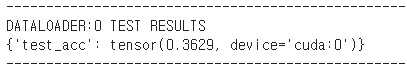

## conv_dim = 64 with ctc loss (LineCNN)

In [ ]:
!python training/run_experiment.py --conv_dim=64 --max_epochs=10 --gpus=1 --num_workers=4 --data_class=EMNISTLines --min_overlap=0.25 --max_overlap=0.25 --model_class=LineCNN --window_width=28 --window_stride=20 --loss=ctc


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
EMNISTLinesDataset loading data from HDF5...
2021-08-09 13:53:29.984459: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

   | Name               | Type               | Params
-----------------------------------------------------------
0  | model              | LineCNN            | 2.7 M 
1  | model.convs        | Sequential         | 2.4 M 
2  | model.convs.0      | ConvBlock          | 640   
3  | model.convs.0.conv | Conv2d             | 640   
4  | model.convs.0.relu | ReLU               | 0     
5  | model.convs.1      | ConvBlock       

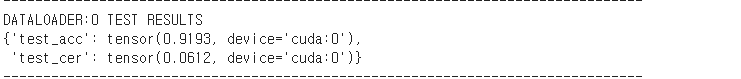

## conv_dim = 64 with ctc loss (LineCNNLSTM)

In [ ]:
!python training/run_experiment.py --conv_dim=64 --max_epochs=10 --gpus=1 --num_workers=4 --data_class=EMNISTLines --min_overlap=0.25 --max_overlap=0.25 --model_class=LineCNNLSTM --window_width=28 --window_stride=20 --loss=ctc


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
EMNISTLinesDataset generating data for train...
[nltk_data] Downloading package brown to /content/fsdl-text-
[nltk_data]     recognizer-2021-labs/data/downloaded/nltk...
[nltk_data]   Unzipping corpora/brown.zip.
709MB [00:15, 49.1MB/s]               
Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balan

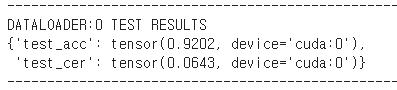

## conv_dim = 64 with ctc loss (LineCNNLSTM)
window_stride = 28 -> 14

In [ ]:
!python training/run_experiment.py --conv_dim=64 --max_epochs=10 --gpus=1 --num_workers=4 --data_class=EMNISTLines --min_overlap=0.25 --max_overlap=0.25 --model_class=LineCNNLSTM --window_width=28 --window_stride=14 --loss=ctc

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
EMNISTLinesDataset loading data from HDF5...
2021-08-10 13:37:09.120802: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

   | Name                        | Type               | Params
--------------------------------------------------------------------
0  | model 

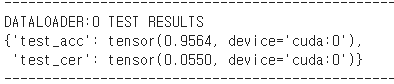

LineCNN w. BATCHNORM




```
class LineCNN(nn.Module):
    """
    Model that uses a simple CNN to process an image of a line of characters with a window, outputs a sequence of logits
    """

    def __init__(
        self,
        data_config: Dict[str, Any],
        args: argparse.Namespace = None,
    ) -> None:
        super().__init__()
        self.data_config = data_config
        self.args = vars(args) if args is not None else {}
        self.num_classes = len(data_config["mapping"])
        self.output_length = data_config["output_dims"][0]

        _C, H, _W = data_config["input_dims"]
        conv_dim = self.args.get("conv_dim", CONV_DIM)
        fc_dim = self.args.get("fc_dim", FC_DIM)
        self.WW = self.args.get("window_width", WINDOW_WIDTH)
        self.WS = self.args.get("window_stride", WINDOW_STRIDE)
        self.limit_output_length = self.args.get("limit_output_length", False)

        # Input is (1, H, W)
        self.convs = nn.Sequential(
            ConvBlock(1, conv_dim),
            ConvBlock(conv_dim, conv_dim),
            ConvBlock(conv_dim, conv_dim, stride=2),
            ConvBlock(conv_dim, conv_dim),
            ConvBlock(conv_dim, conv_dim * 2, stride=2),
            ConvBlock(conv_dim * 2, conv_dim * 2),
            ConvBlock(conv_dim * 2, conv_dim * 4, stride=2),
            ConvBlock(conv_dim * 4, conv_dim * 4),
            ConvBlock(
                conv_dim * 4, fc_dim, kernel_size=(H // 8, self.WW // 8), stride=(H // 8, self.WS // 8), padding=0
            ),
        )
        self.fc1 = nn.Linear(fc_dim, fc_dim)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(fc_dim, self.num_classes)
        # batchnorm 추가
        self.bn = nn.BatchNorm2d(fc_dim)

        self._init_weights()

    def _init_weights(self):
        """
        Initialize weights in a better way than default.
        See https://github.com/pytorch/pytorch/issues/18182
        """
        for m in self.modules():
            if type(m) in {
                nn.Conv2d,
                nn.Conv3d,
                nn.ConvTranspose2d,
                nn.ConvTranspose3d,
                nn.Linear,
            }:
                nn.init.kaiming_normal_(m.weight.data, a=0, mode="fan_out", nonlinearity="relu")
                if m.bias is not None:
                    _fan_in, fan_out = nn.init._calculate_fan_in_and_fan_out(  # pylint: disable=protected-access
                        m.weight.data
                    )
                    bound = 1 / math.sqrt(fan_out)
                    nn.init.normal_(m.bias, -bound, bound)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Parameters
        ----------
        x
            (B, 1, H, W) input image

        Returns
        -------
        torch.Tensor
            (B, C, S) logits, where S is the length of the sequence and C is the number of classes
            S can be computed from W and self.window_width
            C is self.num_classes
        """
        _B, _C, _H, _W = x.shape
        
        x = self.convs(x)  # (B, FC_DIM, 1, Sx)
        
        x = self.bn(x)
        
        x = F.relu(x)
        x = x.squeeze(2).permute(0, 2, 1)  # (B, S, FC_DIM)
        x = F.relu(self.fc1(x))  # -> (B, S, FC_DIM)
        x = self.dropout(x)
        x = self.fc2(x)  # (B, S, C)
        x = x.permute(0, 2, 1)  # -> (B, C, S)
        if self.limit_output_length:
            x = x[:, :, : self.output_length]
        return x
```



In [ ]:
!python training/run_experiment.py --conv_dim=64 --max_epochs=10 --gpus=1 --num_workers=4 --data_class=EMNISTLines --min_overlap=0.25 --max_overlap=0.25 --model_class=LineCNN --window_width=28 --window_stride=14 --loss=ctc

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
EMNISTLinesDataset loading data from HDF5...
2021-08-10 14:00:23.671241: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

   | Name               | Type               | Params
-----------------------------------------------------------
0  | model              | LineCNN            | 2.7 M 
1  | model.convs        | Sequential         | 2.4 M 
2  | model.convs.0      | ConvBlock          | 640   
3  | model.convs.0.conv | Conv2d             | 640   
4  | model.convs.0.relu | ReLU               | 0     
5  | model.convs.1      | ConvBlock       

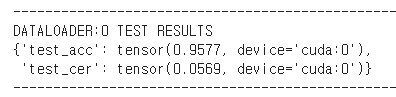